# Proje Amacı ve Dijital Farkındalık Analizi

* Bu projenin amacı, **YouTube platformundaki popüler içeriklerin geniş kitleler tarafından nasıl ve neden tercih edildiğini** analiz ederek dijital farkındalık oluşturmaktır. Dijital farkındalık, kullanıcıların çevrimiçi içeriklere yönelik daha bilinçli ve sağlıklı kararlar almasını sağlamada büyük bir öneme sahiptir.

### Veri Seti Hakkında

* Bu veri seti, YouTube kanallarının farklı kategorilerdeki abone sayıları gibi çeşitli özelliklerini içermektedir. **Kategori, içerik türü, abone sayısı** gibi değişkenler, izleyici davranışları üzerinde etkili olabilecek önemli faktörleri yansıtmaktadır.
* Veriseti kaggle ortamından alınmıştır.
* Kaynak:  https://www.kaggle.com/datasets/surajjha101/top-youtube-channels-data

### Veri Seti Hakkında

Bu veriseti, sahip oldukları abone sayısına göre en iyi YouTube kanallarıyla ilgili 7 özelliği içerir. Bu özellikler, uygun açıklamalarıyla birlikte şu şekildedir:
- **rank**: Kanalın sahip olduğu abone sayısına göre sıralaması.
-**Youtuber**: Kanalın Resmi Adı
-**subscribers**: Kanalın sahip olduğu abone sayısı
-**video views**: Tüm videoların toplu olarak izlendiği sayı
-**video count**: Kanalın şu ana kadar yüklediği video sayısı
-**category**: Kanalın kategorisi (tür)
-**started**: Kanalın başlatıldığı yıl

### Yöntem ve Model Seçimi

* **Linear Regression** modeli kullanılarak, kanalların özelliklerinin abone sayısına etkisi analiz edilmiştir. Bu model, izleyici davranışlarının hangi içerik türleri etrafında yoğunlaştığını anlamamıza yardımcı olurken, aynı zamanda **kanalların kullanıcı üzerindeki etkisini** öngörmeyi amaçlamaktadır.

* Bu analizler, kullanıcıların çevrimiçi içerikleri değerlendirirken daha bilinçli kararlar vermelerine katkı sunarak dijital farkındalığı artırmayı hedeflemektedir.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('most_subscribed_youtube_channels.csv')
df

,rank,Youtuber,subscribers,video views,video count,category,started
0,1,T-Series,"222,000,000","198,459,090,822","17,317",Music,2006
1,2,YouTube Movies,"154,000,000",0,0,Film & Animation,2015
2,3,Cocomelon - Nursery Rhymes,"140,000,000","135,481,339,848",786,Education,2006
3,4,SET India,"139,000,000","125,764,252,686","91,271",Shows,2006
4,5,Music,"116,000,000",0,0,NaN,2013
...,...,...,...,...,...,...,...
995,996,JP Plays,"10,900,000","4,609,300,218","3,528",Gaming,2014
996,997,TrapMusicHDTV,"10,900,000","4,070,521,973",690,Music,2013
997,998,Games EduUu,"10,900,000","3,093,784,767","1,006",Gaming,2011
998,999,Hueva,"10,900,000","3,040,301,750",831,Gaming,2012


#1. Veri Setinin Genel İncelemesi

* Veri setinin boyutu, sütun ve satır sayısı incelenir.
* Sütun isimleri ve veri tipleri belirlenir.
* Eksik değerler, boş hücreler ve veri tipleri kontrol edilerek, veri temizleme adımlarına ihtiyaç olup olmadığı değerlendirilir.

In [4]:
df.head(9)

,rank,Youtuber,subscribers,video views,video count,category,started
0,1,T-Series,"222,000,000","198,459,090,822","17,317",Music,2006
1,2,YouTube Movies,"154,000,000",0,0,Film & Animation,2015
2,3,Cocomelon - Nursery Rhymes,"140,000,000","135,481,339,848",786,Education,2006
3,4,SET India,"139,000,000","125,764,252,686","91,271",Shows,2006
4,5,Music,"116,000,000",0,0,NaN,2013
5,6,PewDiePie,"111,000,000","28,469,458,228","4,497",Gaming,2010
6,7,MrBeast,"102,000,000","16,832,456,681",726,Entertainment,2012
7,8,✿ Kids Diana Show,"99,700,000","79,602,288,245","1,009",People & Blogs,2015
8,9,Like Nastya,"99,200,000","81,963,845,811",702,People & Blogs,2016


In [5]:
df.tail()

,rank,Youtuber,subscribers,video views,video count,category,started
995,996,JP Plays,"10,900,000","4,609,300,218","3,528",Gaming,2014
996,997,TrapMusicHDTV,"10,900,000","4,070,521,973",690,Music,2013
997,998,Games EduUu,"10,900,000","3,093,784,767","1,006",Gaming,2011
998,999,Hueva,"10,900,000","3,040,301,750",831,Gaming,2012
999,1000,Dobre Brothers,"10,900,000","2,808,411,693",590,People & Blogs,2017


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   rank         1000 non-null   int64 
 1   Youtuber     1000 non-null   object
 2   subscribers  1000 non-null   object
 3   video views  1000 non-null   object
 4   video count  1000 non-null   object
 5   category     973 non-null    object
 6   started      1000 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 54.8+ KB


#2. Temel İstatistiklerin Çıkartılması
* Her bir sayısal sütun için ortalama, medyan, minimum, maksimum gibi temel istatistikler hesaplanır.
* Sayısal olmayan sütunlar için benzersiz değer sayısı ve kategori dağılımları gözden geçirilir.

In [7]:
df.describe()

,rank,started
count,1000.000000,1000.000000
mean,500.500000,2012.376000
std,288.819436,3.998076
min,1.000000,1970.000000
25%,250.750000,2010.000000
50%,500.500000,2013.000000
75%,750.250000,2015.000000
max,1000.000000,2021.000000


# 3. Eksik ve Aykırı Değerlerin Tespiti

* Eksik değerler belirlenir ve doldurma, çıkarma veya değer atama stratejileri gözden geçirilir.


In [8]:
df.isnull().any()

,0
rank,False
Youtuber,False
subscribers,False
video views,False
video count,False
category,True
started,False


In [9]:
df.isnull().sum()

,0
rank,0
Youtuber,0
subscribers,0
video views,0
video count,0
category,27
started,0


In [10]:
df["category"].unique()

array(['Music', 'Film & Animation', 'Education', 'Shows', nan, 'Gaming',
       'Entertainment', 'People & Blogs', 'Sports', 'Howto & Style',
       'News & Politics', 'Comedy', 'Trailers', 'Nonprofits & Activism',
       'Science & Technology', 'Movies', 'Pets & Animals',
       'Autos & Vehicles', 'Travel & Events'], dtype=object)

In [11]:
df.shape

(1000, 7)

In [12]:
# Sayısal özelliklerin istatistiksel özeti
print(df.describe())

# Kategorik kolonların benzersiz değer sayılarını gözlemleyelim
for col in df.select_dtypes(include='object').columns:
    print(f"{col} unique values: {df[col].nunique()}")


              rank      started
count  1000.000000  1000.000000
mean    500.500000  2012.376000
std     288.819436     3.998076
min       1.000000  1970.000000
25%     250.750000  2010.000000
50%     500.500000  2013.000000
75%     750.250000  2015.000000
max    1000.000000  2021.000000
Youtuber unique values: 999
subscribers unique values: 286
video views unique values: 991
video count unique values: 856
category unique values: 18


In [13]:
# Eksik verilerin yüzdesini hesaplayalım
missing_percent = (df.isnull().sum() / len(df)) * 100
print(missing_percent[missing_percent > 0])

category    2.7
dtype: float64


In [14]:
# En sık bulunan kategori ile doldurma
df['category'].fillna(df['category'].mode()[0], inplace=True)


In [15]:
print(df.isnull().sum())  # Her sütundaki NaN sayısını kontrol et

rank           0
Youtuber       0
subscribers    0
video views    0
video count    0
category       0
started        0
dtype: int64


# 4. Veri Dağılımlarının İncelenmesi
* Sayısal değişkenlerin dağılımları histogramlar veya boxplot grafiklerle analiz edilir.
* Aykırı değerler (outliers) sayısal sütunlarda boxplot yardımıyla tespit edilir ve bu değerler üzerinde nasıl bir işlem yapılacağı kararlaştırılır.

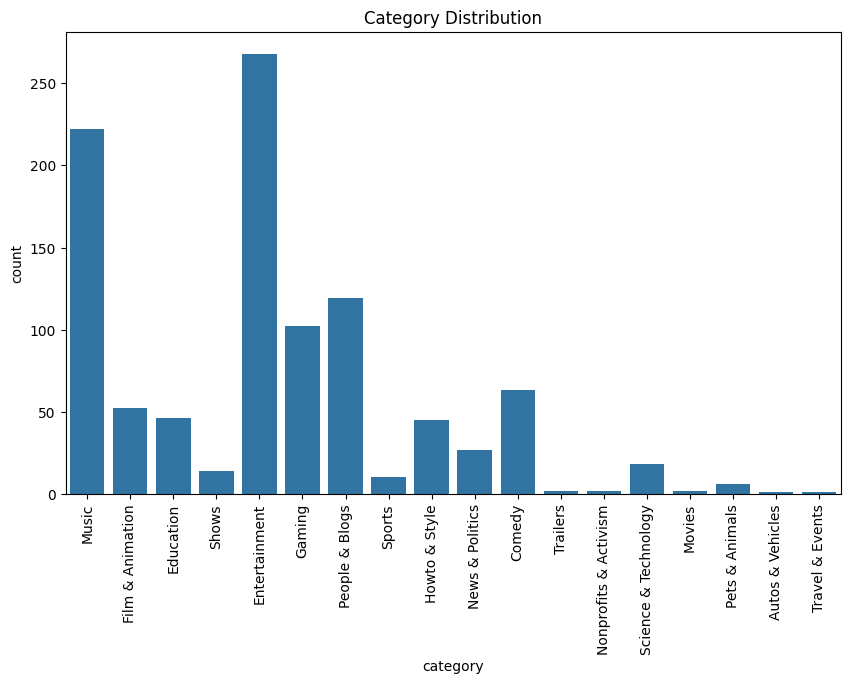

In [16]:
# Örneğin 'category' sütununu görselleştirelim
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='category')
plt.title('Category Distribution')
plt.xticks(rotation=90)
plt.show()


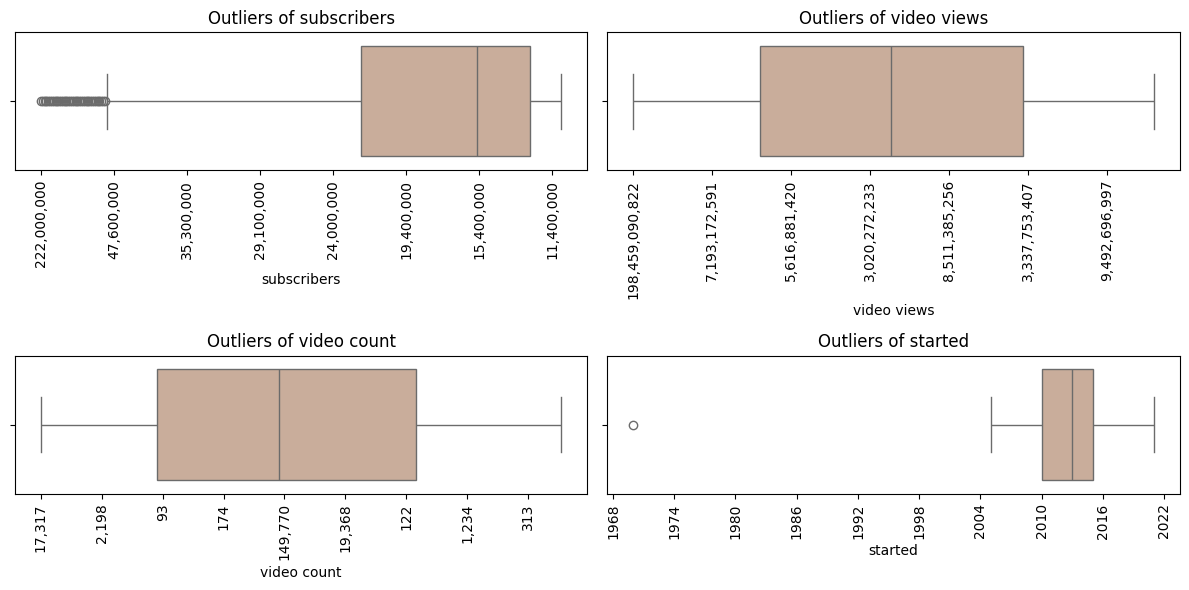

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

int_cols = ['subscribers', 'video views', 'video count', 'started']

def data_outliers(x, fig):
    plt.subplot(2, 2, fig)
    plt.title('Outliers of ' + x)
    sns.boxplot(x=df[x], palette="pink")
    plt.xticks(rotation=90)
    plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10))  # X ekseninde en fazla 10 etiket gösterir

plt.figure(figsize=(12, 6))
for e, i in enumerate(int_cols):
    data_outliers(i, e+1)

plt.tight_layout()
plt.show()



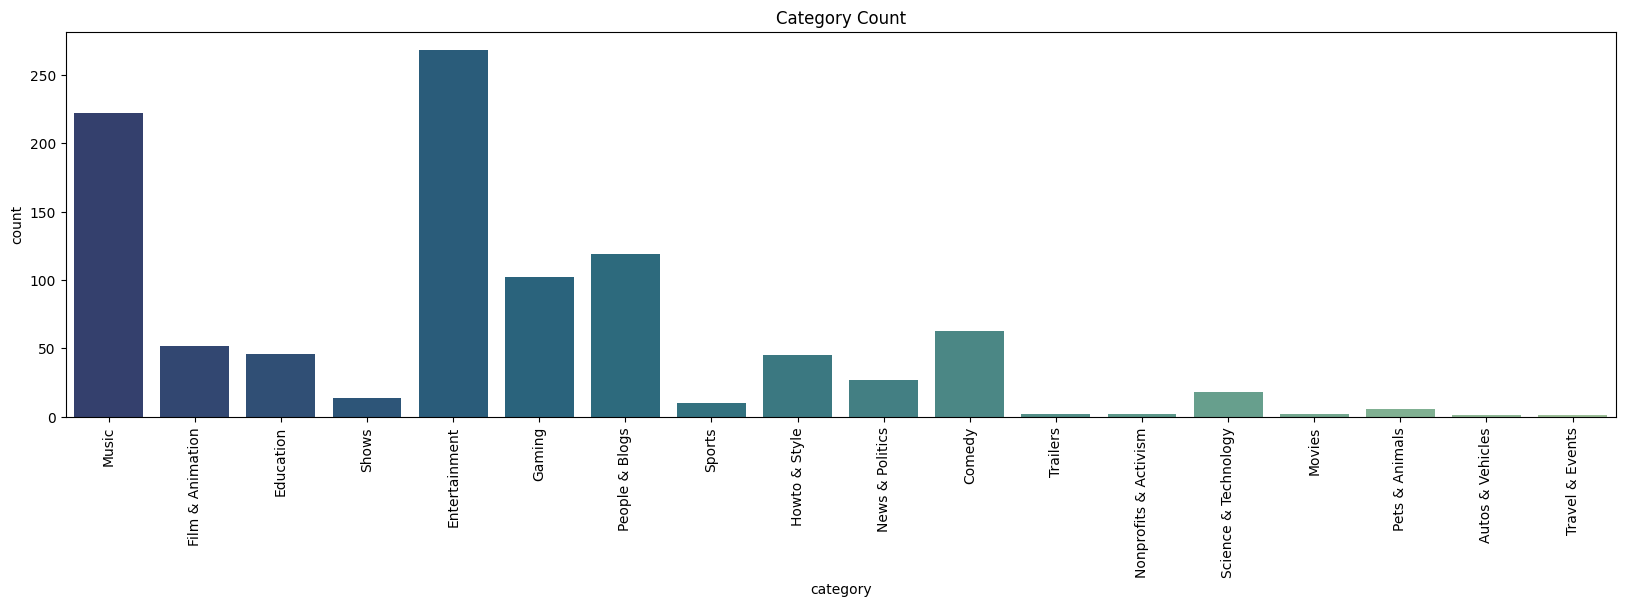

In [18]:
fig ,ax = plt.subplots(figsize = (20,5))
c = sns.countplot(x="category", data=df, orient = 'v', palette = "crest_r")
c.set_title("Category Count")
c.set_xticklabels(c.get_xticklabels(), rotation=90)
plt.show();

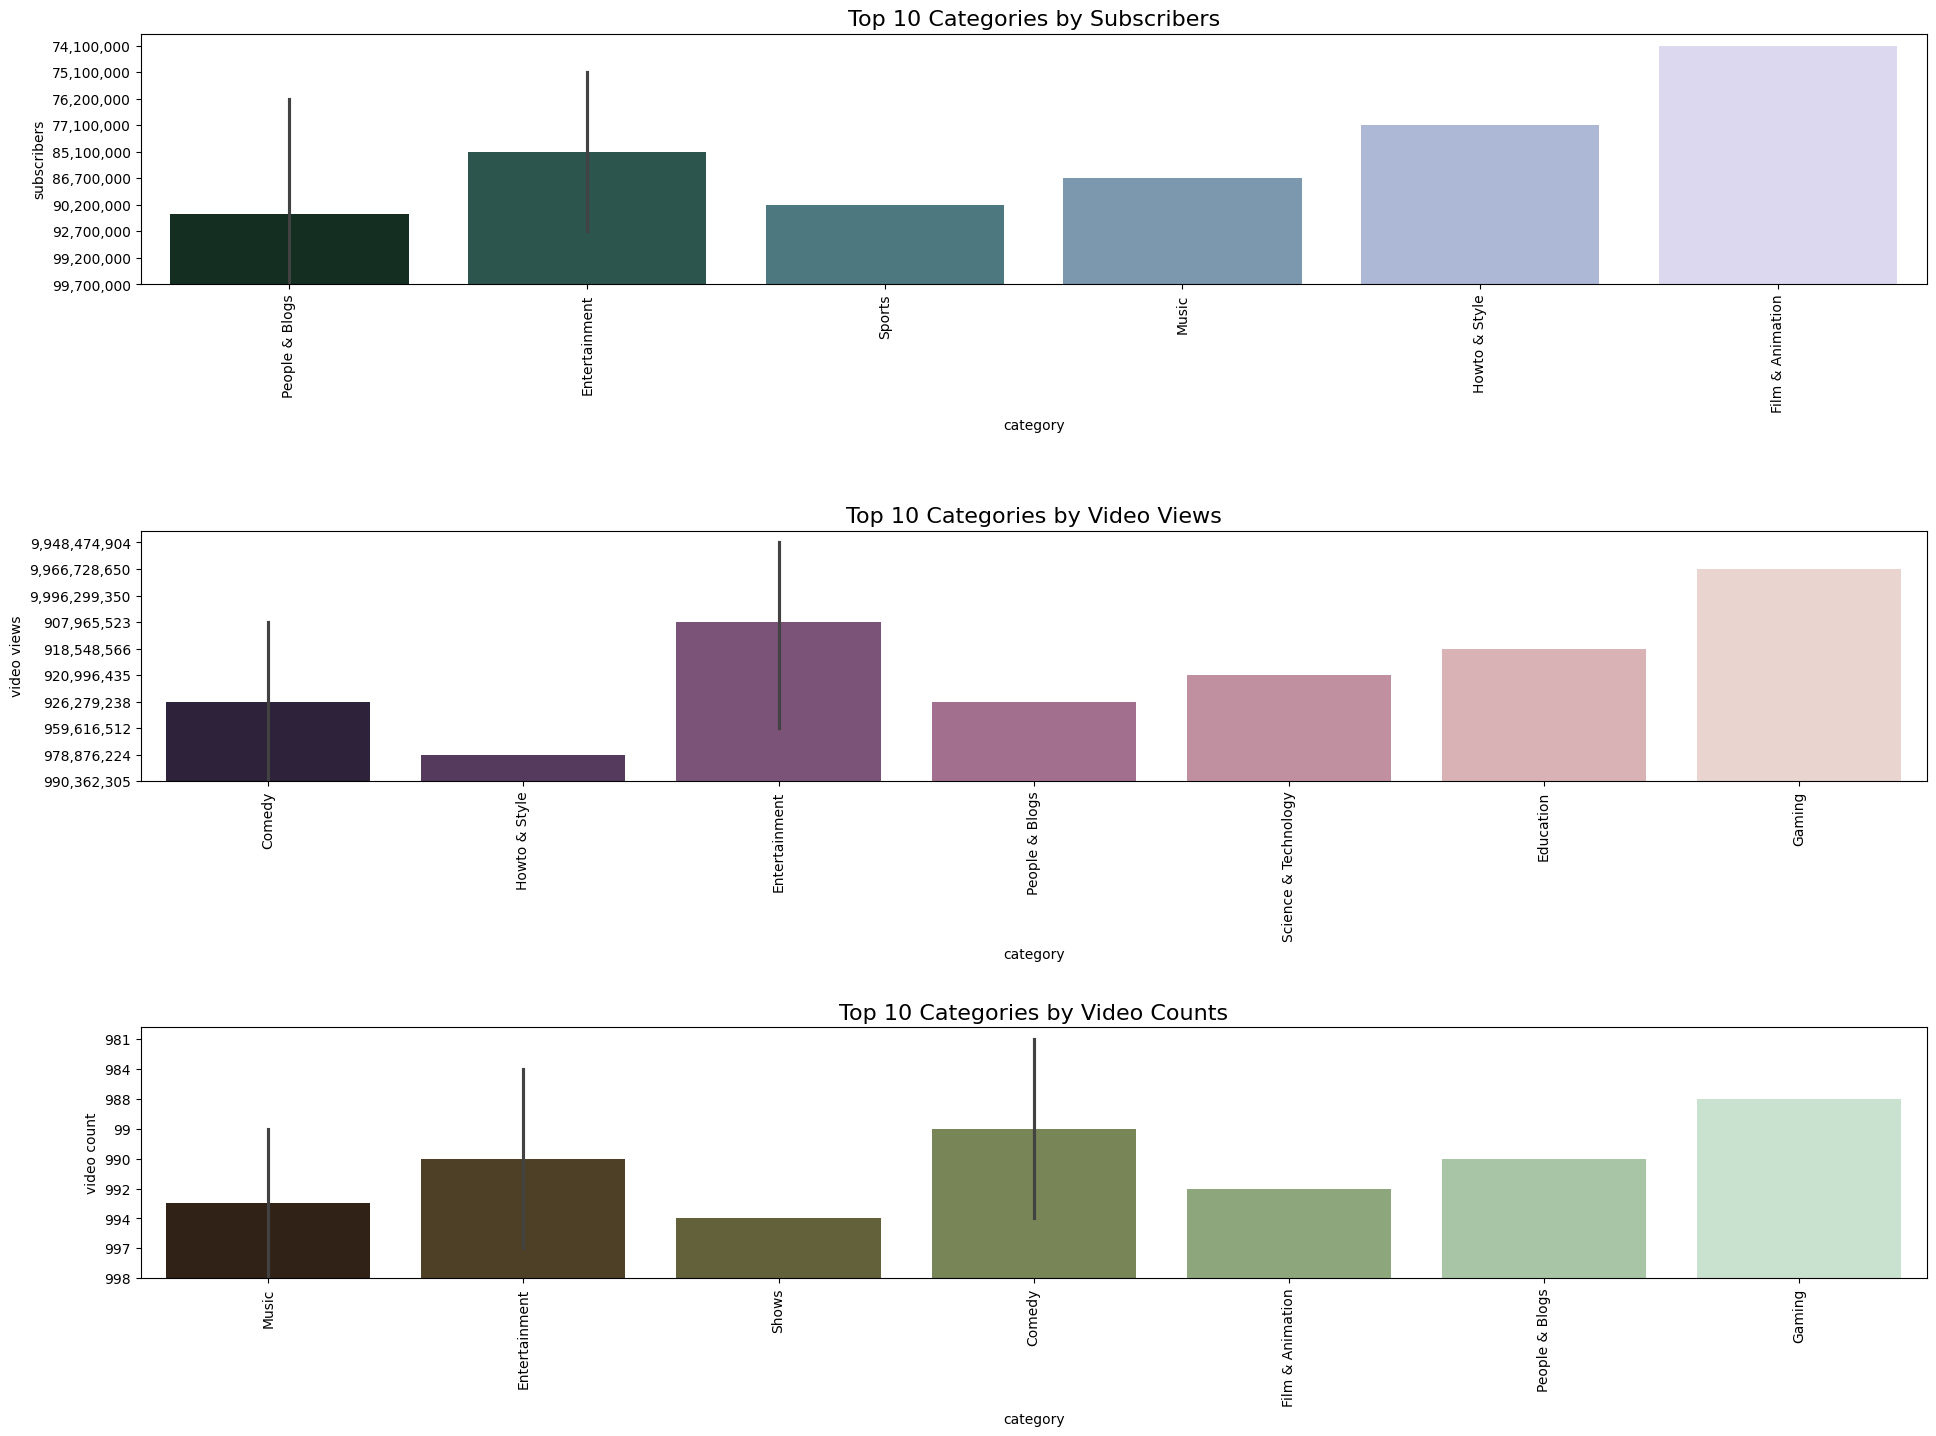

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Grafik alanı ve alt grafiklerin oluşturulması
fig, (ax1, ax2, ax3) = plt.subplots(ncols=1, nrows=3)
fig.set_size_inches(20, 15)

# En yüksek değerlere göre veri sıralama ve ilk 10 kaydı alma
subscribers_df = df.sort_values('subscribers', ascending=False)[:10]
video_views_df = df.sort_values('video views', ascending=False)[:10]
video_counts_df = df.sort_values('video count', ascending=False)[:10]

# Çubuk grafikler
sns.barplot(x="category", y="subscribers", data=subscribers_df, palette="ch:20_r", ax=ax1).set_title('Top 10 Categories by Subscribers', fontsize=16)
sns.barplot(x="category", y="video views", data=video_views_df, palette="ch:30_r", ax=ax2).set_title('Top 10 Categories by Video Views', fontsize=16)
sns.barplot(x="category", y="video count", data=video_counts_df, palette="ch:25_r", ax=ax3).set_title('Top 10 Categories by Video Counts', fontsize=16)

# Y eksenlerini ters çevirme
ax1.invert_yaxis()
ax2.invert_yaxis()
ax3.invert_yaxis()

# X ekseni kategorileri için 90 derece döndürme
ax1.tick_params(axis='x', rotation=90)
ax2.tick_params(axis='x', rotation=90)
ax3.tick_params(axis='x', rotation=90)

# Grafikler arasındaki boşluğu ayarlama
fig.tight_layout(pad=3.0)

plt.show()



# 5. Korelasyon Analizi
* Sayısal değişkenler arasındaki korelasyonlar incelenir. Bu, veri setindeki olası ilişkileri görmek ve analiz sırasında göz önünde bulundurmak için önemlidir.

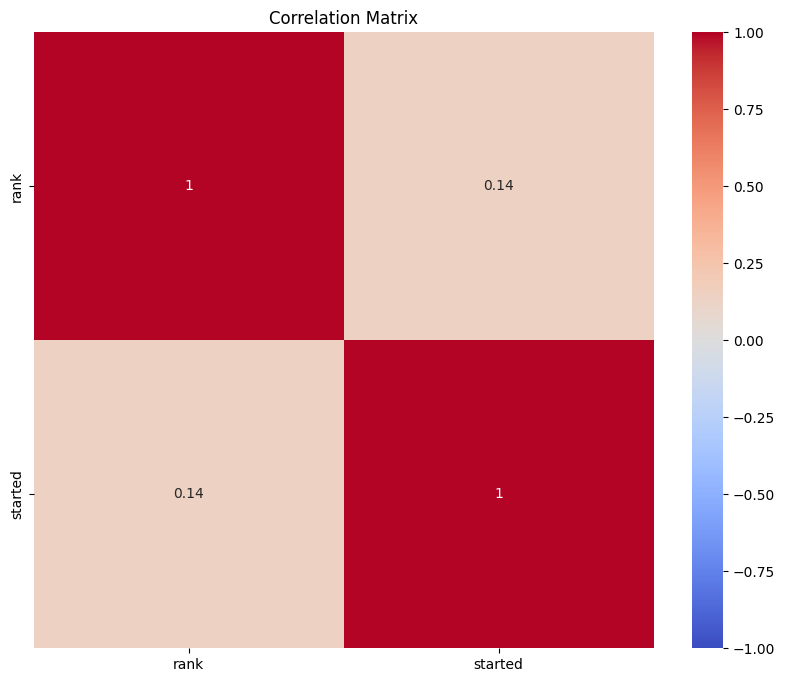

In [24]:
# Select numerical columns only
numerical_df = df.select_dtypes(include=np.number)

# Korelasyon matrisi oluşturma
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


In [25]:
# Özetleme işlemi
print("Veri setinde gözlemlediğimiz bazı önemli bulgular:")
print("1. Kategorik kolonların dağılımı, bazı kategorilerde yoğunlaştığını gösteriyor.")
print("2. Sayısal kolonlarda aykırı değerler mevcut olabilir.")
print("3. Korelasyon analizi, subscriber_count ile diğer sayısal kolonlar arasında ilişkileri ortaya koydu.")


Veri setinde gözlemlediğimiz bazı önemli bulgular:
1. Kategorik kolonların dağılımı, bazı kategorilerde yoğunlaştığını gösteriyor.
2. Sayısal kolonlarda aykırı değerler mevcut olabilir.
3. Korelasyon analizi, subscriber_count ile diğer sayısal kolonlar arasında ilişkileri ortaya koydu.


# 6.Model Belirleme
### Hedef Değişken ve Özelliklerin Belirlenmesi
* Bu adımda, modelimizin tahmin edeceği hedef değişken (`subscribers`) ve bağımsız değişkenler (`features`) belirlenir. `X` değişkenine özellikler atanırken, `y` değişkenine tahmin edilmesi gereken `subscribers` sütunu atanır.

### Hedef Değişkeni Sayısal Tipe Dönüştürme
* `subscribers` sütununda sayısal olmayan karakterler bulunabilir (örn. virgüller). Bu yüzden, `pd.to_numeric` fonksiyonunu kullanarak veriyi doğrudan sayısal bir tipe çeviriyoruz. `errors='coerce'` parametresiyle, dönüştürülemeyen değerler `NaN` olarak işaretlenir ve verinin tutarlı hale gelmesi sağlanır.

### Kategorik Değişkenleri Sayısal Hale Getirme
* Veri setinde, makine öğrenmesi modeline uygun olmayan kategorik değişkenler bulunabilir. Bu değişkenleri sayısal değerlere dönüştürmek için One-Hot Encoding işlemi yapılır. Bu, her kategori için ayrı bir sütun oluşturarak modelin çalışabileceği sayısal verilere dönüştürülmesini sağlar.

### Veriyi Eğitim ve Test Setine Ayırma
* Modelin performansını değerlendirmek için veriyi eğitim ve test seti olarak ikiye ayırıyoruz. `train_test_split` fonksiyonunu kullanarak verinin %70'ini eğitim, %30'unu test için ayırıyoruz. `random_state=42` ayarı, veriyi her seferinde aynı rastgelelik sırasıyla ayırarak tutarlı sonuçlar elde etmemizi sağlar.

### Özellikleri Ölçeklendirme
* Özelliklerin farklı ölçeklerde olması model performansını olumsuz etkileyebilir. `StandardScaler` kullanarak özellikleri standart hale getiriyoruz, böylece model daha hızlı ve dengeli bir şekilde öğrenebilir. `fit_transform` fonksiyonuyla eğitim verisini ölçeklendirirken, `transform` fonksiyonunu test verisini aynı ölçeklendirme ile dönüştürmek için kullanıyoruz.

### Lineer Regresyon Modeli Oluşturma ve Eğitme
* Bu aşamada, tahmin modelimizi oluşturuyoruz. `LinearRegression` sınıfını kullanarak doğrusal regresyon modelini `linear_model` olarak tanımlıyoruz. Ardından `fit` fonksiyonunu kullanarak modeli eğitim verisi (`X_train` ve `y_train`) üzerinde eğitiyoruz. Bu işlem, modelin bağımsız değişkenler ile hedef değişken arasındaki ilişkiyi öğrenmesini sağlar.


In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np



# Hedef değişken ve özellikleri belirleme
# Tahmin etmeye çalışacağımız değişken 'subscribers' olacak
X = df.drop(['subscribers'], axis=1)  # Özellikler (features)
y = df['subscribers']  # Hedef (target)


# Convert 'subscribers' column to numeric, handling commas and errors
y = pd.to_numeric(y.str.replace(',', ''), errors='coerce')


# Kategorik değişkenleri sayısal değerlere dönüştürme (One-Hot Encoding)
X = pd.get_dummies(X, drop_first=True)

# Veriyi eğitim ve test setine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Özellikleri ölçeklendirme
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [27]:
# Modeli oluşturma
linear_model = LinearRegression()

# Modeli eğitim verisi ile eğitme
linear_model.fit(X_train, y_train)


LinearRegression()

# 7. Performans Metriği Yorumlama

**Mean Squared Error (MSE) ve Root Mean Squared Error (RMSE):** Hata değerleri ne kadar düşükse, model o kadar iyi performans gösteriyor demektir.

**R-squared (R2 Score):** Bu değer 0 ile 1 arasında değişir ve 1’e ne kadar yakınsa modelin hedef değişkeni iyi açıkladığını gösterir.

In [28]:
# Test seti üzerinde tahmin yapma
y_pred = linear_model.predict(X_test)

# Modelin performansını değerlendirme
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2 Score):", r2)


Mean Squared Error (MSE): 216963087762083.53
Root Mean Squared Error (RMSE): 14729666.926379684
R-squared (R2 Score): 0.18322747856332589


# 8. Sınıflandırma Sonuçlarının Değerlendirilmesi

Modelin doğruluk ve F1 skorunu hesaplamak için, tahmin edilen `subscribers` değerleri üzerinden sınıflandırma yapıldı. Sınıflandırma işlemi, hedef değişkenin ortalama değeri (`threshold`) kullanılarak gerçekleştirildi. Bu işlem, `subscribers` değerini ortalamanın üzerinde veya altında olacak şekilde iki sınıfa ayırmamıza olanak tanır.

### Eşik Değeri Belirleme
- **Eşik değer (threshold)** olarak `y.mean()` değeri kullanıldı. Bu sayede, `y_test` ve `y_pred` veri setlerindeki değerler, ortalamanın üstünde veya altında olmasına göre **1** veya **0** olarak sınıflandırıldı.

### Model Performans Değerlendirmesi
Sınıflandırma modeli doğruluk (`accuracy`) ve F1 skoruyla (`f1_score`) değerlendirildi. Bu metrikler, sınıflandırma modelinin genel doğruluğunu ve sınıflandırma doğruluğunu ayrıntılı şekilde özetleyen `classification_report` ile tamamlandı.

- **Accuracy**: Modelin doğru sınıflandırma oranını temsil eder.
- **F1 Score**: Özellikle dengesiz veri setlerinde önemli bir metrik olup, modelin doğruluğunu ve geri çağırma oranını dengeleyen bir ölçüdür.
  
Bu metrikler modelin `subscribers` değerlerini ortalamanın üstünde veya altında doğru bir şekilde sınıflandırma başarısını ölçmekte etkili bir değerlendirme aracı sunar.

### Sonuçların Sunumu
Kod çalıştırıldığında, sınıflandırma doğruluğu, F1 skoru ve `classification_report` çıktısı aşağıdaki gibi elde edilir:
- **Accuracy**: Modelin genel doğruluk oranı.
- **F1 Score**: Modelin sınıflandırma doğruluğu ve geri çağırma oranı.
- **Classification Report**: Ayrıntılı sınıflandırma performansı.

Bu analiz, modelimizin sınıflandırma performansını ve doğruluğunu ölçerek projenin son aşamasında önemli içgörüler sağlamaktadır.


In [29]:
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Ortalama değer üzerinden tahminleri sınıflandırma
threshold = y.mean()  # Ortalama eşik olarak alınır
y_test_class = (y_test > threshold).astype(int)  # Test setini sınıflara ayırma
y_pred_class = (y_pred > threshold).astype(int)  # Tahminleri sınıflara ayırma

# Doğruluk ve f1-score hesaplama
accuracy = accuracy_score(y_test_class, y_pred_class)
f1 = f1_score(y_test_class, y_pred_class)

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("\nClassification Report:\n", classification_report(y_test_class, y_pred_class))


Accuracy: 0.7033333333333334
F1 Score: 0.6536964980544747

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.59      0.74       216
           1       0.49      1.00      0.65        84

    accuracy                           0.70       300
   macro avg       0.74      0.79      0.70       300
weighted avg       0.86      0.70      0.72       300

